<a href="https://colab.research.google.com/github/tyukei/AI/blob/master/report1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# レポート１

### scikit-learnのmake_regressionを用いて生成したデータに対して、基底関数を使うことで使わない場合に比べて線形回帰における学習データの誤差をが小さくなることを確認せよ。そして、基底関数を使った場合と使わない場合で汎化誤差にどのような違いが生じるか確かめよ。

[sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)とは
ランダムな回帰問題を生成するライブラリである。


まず、ライブラリーをインストールする

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
plt.rcParams['scatter.edgecolors'] = "gray"

## make_regressionの引数について
引数を設定することで、より幅広いデータを作成することができる。

今回活用した引数をピックアップして説明を行う。

```
n_samples
```
サンプル数を指定できる。データを多くしたり、少なくしたりできる。

```
n_features
``` 
特徴量の数を指定できる。２以上のとき非線形分離となる。

```
n_informative
```
目的変数のラベルと相関が強い特徴量の数が指定できる

```
random_state
```
乱数の状態を指定できる

## make_regressionを用いてデータを作成する。

今回は、データ数が１０のとき、２０のとき、
特徴量が１のとき、２のとき、３のときでデータを作成した。

データ数はn_samplesで指定でき、特徴量はn_featuresで指定ができる。

plt.subplotsで複数のグラフを一度にまとめてやることができる。

scatterでグラフを描写する

set_titleでタイトルを設定した。


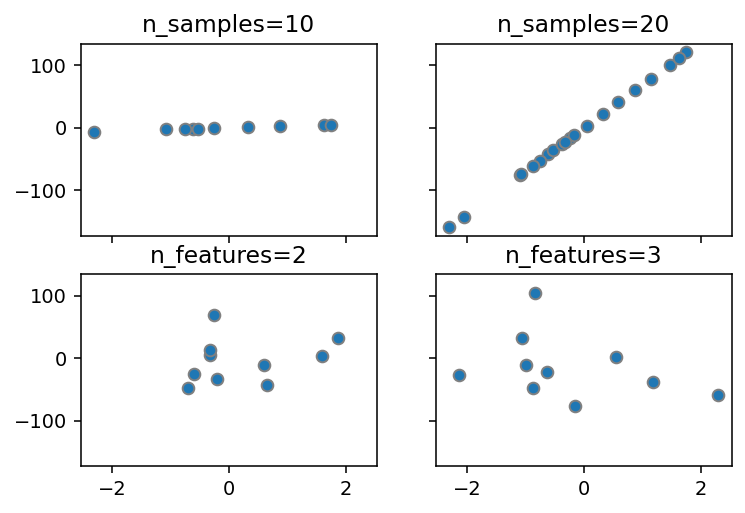

In [124]:
# データの生成
X1,Y1 = make_regression(n_samples=10,n_features=1,n_informative=1,random_state=1)
X2,Y2 = make_regression(n_samples=20,n_features=1,n_informative=1,random_state=1)
X3,Y3 = make_regression(n_samples=10,n_features=2,n_informative=1,random_state=5)
X4,Y4 = make_regression(n_samples=10,n_features=3,n_informative=1,random_state=2)

# 複数グラフの列と行を指定
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,dpi=140) 
ax =ax.ravel()

# グラフに描写
ax[0].scatter(X1[:,0],Y1)
ax[1].scatter(X2[:,0],Y2)
ax[2].scatter(X3[:,0],Y3)
ax[3].scatter(X4[:,0],Y4)

# タイトルのセット
ax[0].set_title("n_samples=10")
ax[1].set_title("n_samples=20")
ax[2].set_title("n_features=2")
ax[3].set_title("n_features=3")

plt.show()

## 線形回帰の描写

まず、ライブラリを用意する。

学習データと評価データに分ける用のtrain_test_split と 線形回帰用のLinearRegressionである

線形回帰を描画する関数をlinear_lineとして作成した。

引数にはデータのｘとｙを入れる。
戻り値はないが、データの散布図とグラフの線形回帰を描画する。

まず、引数のｘをreshape(-1,1)とする。
ｘを2D配列としてmodel.fitでエラーを起こさせないためにする。

次に、


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [128]:
def linear_line(X,y):
  x = np.array(X).reshape(-1,1) # これがないとmodel.fitで1D配列errorとなる
  train_x, test_x, train_y, test_y = train_test_split(x,y,random_state=1) # 学習データと評価データに分割
  model = LinearRegression()
  model.fit(train_x,train_y)
  pred = model.predict(test_x)
  A=model.coef_
  B=model.intercept_
  z = A*x+B
  plt.scatter(X,y,color='blue')
  plt.plot(x,z,color='green')
  plt.xlim(-2, 2)
  plt.ylim(-100, 100)

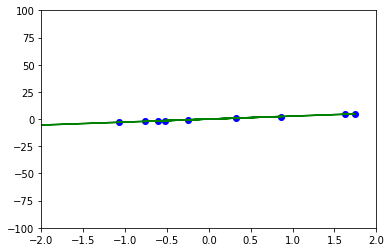

In [ ]:
linear_line(X1,Y1)

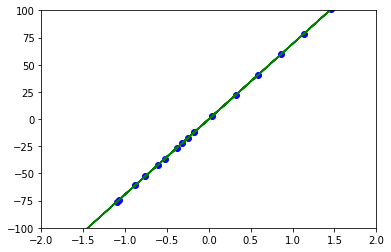

In [ ]:
linear_line(X2,Y2)

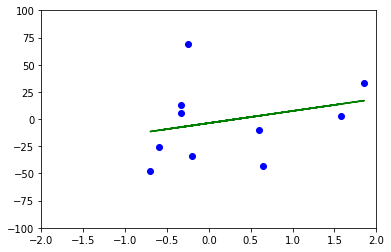

In [ ]:
linear_line(X3[:,0],Y3)

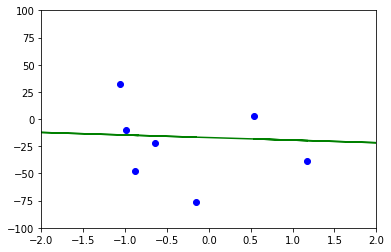

In [ ]:
linear_line(X4[:,0],Y4)

In [ ]:
def polinomial2(X,y):
  X2 = np.array(X).reshape(-1,1) # これがないとmodel.fitで1D配列errorとなる  
  from sklearn.preprocessing import PolynomialFeatures
  poly = PolynomialFeatures(degree = 2)
  x = poly.fit_transform(X2)
  
  from sklearn.model_selection import train_test_split
  train_x, test_x, train_y, test_y = train_test_split(x,y,random_state=1)

  from sklearn.linear_model import LinearRegression
  model = LinearRegression()

  model.fit(train_x,train_y)
  pred = model.predict(test_x)
  A=model.coef_
  B=model.intercept_
  xp = np.arange(-10, 10, 0.1)
  z = A[1]*xp+A[2]*xp**2+B
  plt.scatter(X,y,color='blue')
  plt.plot(xp,z,color='green')
  plt.xlim(-2, 2)
  plt.ylim(-100, 100)

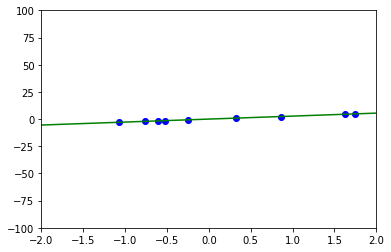

In [ ]:
polinomial2(X1,Y1)

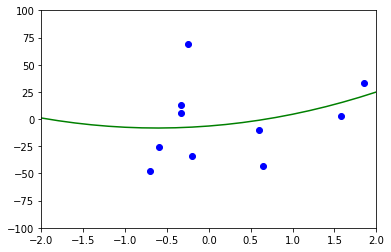

In [ ]:
polinomial2(X3[:,0],Y3)

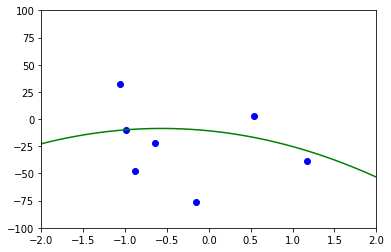

In [ ]:
polinomial2(X4[:,0],Y4)

In [ ]:
def polinomial3(X,y):
  X2 = np.array(X).reshape(-1,1) # これがないとmodel.fitで1D配列errorとなる  
  from sklearn.preprocessing import PolynomialFeatures
  poly = PolynomialFeatures(degree = 3) 
  x = poly.fit_transform(X2)
  
  from sklearn.model_selection import train_test_split
  train_x, test_x, train_y, test_y = train_test_split(x,y,random_state=1)

  from sklearn.linear_model import LinearRegression
  model = LinearRegression()

  model.fit(train_x,train_y)
  pred = model.predict(test_x)
  A=model.coef_
  B=model.intercept_
  xp = np.arange(-10, 10, 0.1)
  z = A[1]*xp+A[2]*xp**2+ A[3]*xp**3+B
  plt.scatter(X,y,color='blue')
  plt.plot(xp,z,color='green')
  plt.xlim(-2, 2)
  plt.ylim(-500, 500)

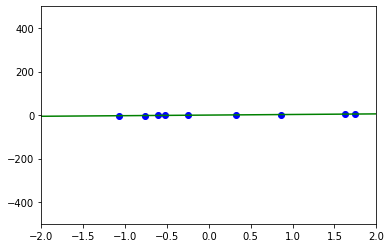

In [ ]:
polinomial3(X1,Y1)

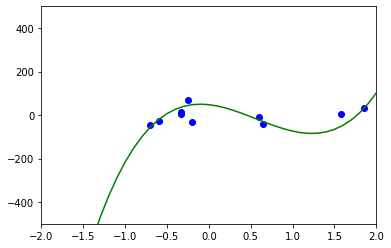

In [ ]:
polinomial3(X3[:,0],Y3)


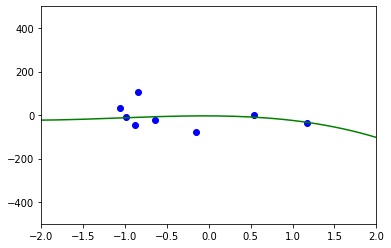

In [ ]:
polinomial3(X4[:,0],Y4)

In [ ]:
def polinomial5(X,y):
  X2 = np.array(X).reshape(-1,1) # これがないとmodel.fitで1D配列errorとなる  
  from sklearn.preprocessing import PolynomialFeatures
  poly = PolynomialFeatures(degree = 5)
  x = poly.fit_transform(X2)
  
  from sklearn.model_selection import train_test_split
  train_x, test_x, train_y, test_y = train_test_split(x,y,random_state=1)

  from sklearn.linear_model import LinearRegression
  model = LinearRegression()

  model.fit(train_x,train_y)
  pred = model.predict(test_x)
  A=model.coef_
  B=model.intercept_
  xp = np.arange(-10, 10, 0.1)
  z = A[1]*xp+A[2]*xp**2+ A[3]*xp**3+A[4]*xp**4+A[5]*xp**5+B
  plt.scatter(X,y,color='blue')
  plt.plot(xp,z,color='green')
  plt.xlim(-2, 2)
  plt.ylim(-500, 500)

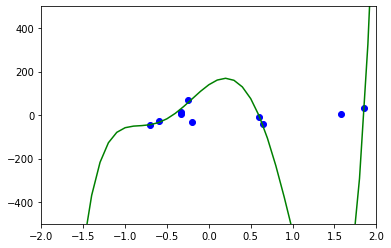

In [ ]:
polinomial5(X3[:,0],Y3)

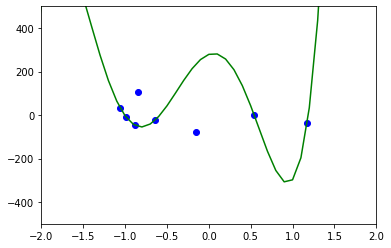

In [ ]:
polinomial5(X4[:,0],Y4)